In [1]:
import pandas as pd
import os
__file__ = os.getcwd()
dirname = os.path.dirname(__file__)
input_file = os.path.join(dirname, 'data\\dogodki50_spucano_glavnekategorije_veselice.csv')
df = pd.read_csv(input_file, header = 0)

df = df.sample(n=2000, replace=True, random_state=1) 
df.head()

,naziv,opis,datum_od,stevilo,sifra_prizorisca,kategorije_sifre,kategorije_nazivi,veselica,nazivpp,opispp,kategorije_sifre_new,kategorije_nazivi_new,is_veselica_prediction,is_veselica_prediction_score,veselicaNew
5157,TrNOVfest - KiNG FOO & Metalsteel,"trNOVfest, četrtek, 22. avgust\n\nKiNG FOO & M...",2019-08-22 18:00:00,325,7.178823e+14,"2,6,51","Music,Concert,Music festival",0,trnovfest king foa metalsteeti,trnovfest četrtek avgust king foa metalsteeti ...,2,Music,-1,44.943543,0
235,Vesela pohorska sobota,Na ZPM Maribor v Tednu otroka® že tradicionaln...,2019-10-12 12:00:00,95,5.418738e+14,"4,16,32","Volunteering,Kid Friendly,Causes",0,vesel pohorski sobota,maribor teden tradicionalno zaključevati polet...,32,Causes,-1,44.945033,0
3980,Josip A Lisac + Ogenj,Josip A Lisac (JAL) so nastali leta 2009 v Nov...,2019-09-06 21:00:00,60,9.594483e+14,2,Music,0,josip lisac ogenj,josip lisac jati nastati leto nov sad pobuda p...,2,Music,-1,44.943756,0
5192,Leja Jurišić in Milko Lazar: De facto (pojdi s...,»Moje telo se nehote pogovarja z njegovo glasb...,2019-11-07 20:00:00,61,2.651669e+14,"12,22,38,94","Dancing,Classical music,Dance,Drama (theater)",0,lej jurišić milka lazar dejati fact iti,telo nehote pogovarjati glasba grobost razmerj...,15,Party,-1,44.943535,0
7935,Za žur bosta poskrbeli skupina Ljubavnici in I...,"Predprodaja vstopnic:\n\n• Trgovina Marija, Mo...",2019-10-05 21:30:00,848,1.290024e+14,15,Party,0,žur poskrbeti skupina ljubavnica inesa erbus,predprodaja vstopnica trgovina marija most kom...,15,Party,-1,44.942522,0


In [2]:
df = df[pd.notnull(df['opispp'])]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 5157 to 1274
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   naziv                         2000 non-null   object 
 1   opis                          2000 non-null   object 
 2   datum_od                      2000 non-null   object 
 3   stevilo                       2000 non-null   int64  
 4   sifra_prizorisca              1996 non-null   float64
 5   kategorije_sifre              2000 non-null   object 
 6   kategorije_nazivi             2000 non-null   object 
 7   veselica                      2000 non-null   int64  
 8   nazivpp                       1998 non-null   object 
 9   opispp                        2000 non-null   object 
 10  kategorije_sifre_new          2000 non-null   int64  
 11  kategorije_nazivi_new         2000 non-null   object 
 12  is_veselica_prediction        2000 non-null   int64  
 13  

In [4]:
col = ['kategorije_nazivi_new', 'opispp']
df['kategorije_nazivi_new'].replace({'Art': 'Umetnost', 'Causes': 'Dobrodelno', 'Comedy': 'Komedija', 'Food': 'Hrana', 'Health': 'Zdravje', 'Music': 'Glasba', 'Other': 'Ostalo', 'Party': 'Zabava', 'Sports': 'Šport'}, inplace=True)
df = df[col]

In [5]:
df.columns

Index(['kategorije_nazivi_new', 'opispp'], dtype='object')

In [6]:
df.columns = ['kategorije_nazivi_new', 'opispp']

In [7]:
df['category_id'] = df['kategorije_nazivi_new'].factorize()[0]
from io import StringIO
category_id_df = df[['kategorije_nazivi_new', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'kategorije_nazivi_new']].values)

In [8]:
df.head()

,kategorije_nazivi_new,opispp,category_id
5157,Glasba,trnovfest četrtek avgust king foa metalsteeti ...,0
235,Dobrodelno,maribor teden tradicionalno zaključevati polet...,1
3980,Glasba,josip lisac jati nastati leto nov sad pobuda p...,0
5192,Zabava,telo nehote pogovarjati glasba grobost razmerj...,2
7935,Zabava,predprodaja vstopnica trgovina marija most kom...,2


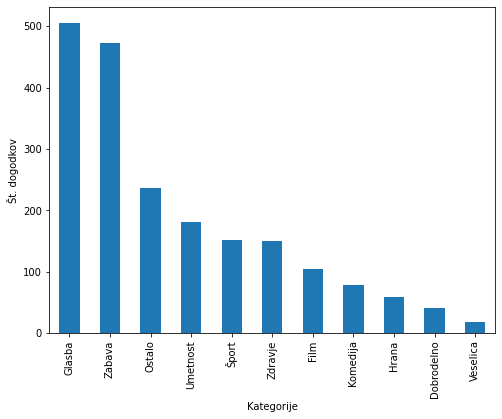

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('kategorije_nazivi_new').opispp.count().sort_values(ascending=False).plot.bar(ylim=0,)
plt.ylabel('Št. dogodkov')
plt.xlabel('Kategorije')
plt.show()

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf = TfidfVectorizer(sublinear_tf=True, max_df=0.95, min_df=4, ngram_range=(1, 2), norm='l2')
tfidf = TfidfVectorizer(use_idf=True, max_df=0.95, min_df=2)  

features = tfidf.fit_transform(df.opispp).toarray()
labels = df.category_id
features.shape

(2000, 13377)

In [11]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for kategorije_nazivi_new, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(kategorije_nazivi_new))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Dobrodelno':
  . Most correlated unigrams:
       . ptica
       . lgbtqia
  . Most correlated bigrams:
       . 
# 'Film':
  . Most correlated unigrams:
       . predstava
       . film
  . Most correlated bigrams:
       . 
# 'Glasba':
  . Most correlated unigrams:
       . glasben
       . koncert
  . Most correlated bigrams:
       . 
# 'Hrana':
  . Most correlated unigrams:
       . burger
       . chef
  . Most correlated bigrams:
       . 
# 'Komedija':
  . Most correlated unigrams:
       . komik
       . perica
  . Most correlated bigrams:
       . 
# 'Ostalo':
  . Most correlated unigrams:
       . sejem
       . cityparka
  . Most correlated bigrams:
       . 
# 'Umetnost':
  . Most correlated unigrams:
       . umetnost
       . razstava
  . Most correlated bigrams:
       . 
# 'Veselica':
  . Most correlated unigrams:
       . gasilski
       . veselica
  . Most correlated bigrams:
       . 
# 'Zabava':
  . Most correlated unigrams:
       . plesen
       . dje
  . Most

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['opispp'], df['kategorije_nazivi_new'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)



In [13]:
predictString = "čas lifa prihajati zvezda vedeti vedeti lifa vroč vedeti super žurer hoditi dom lifa prihajati fantastičen ogrevanje poskrbeti sandy deej vstopnina predprodaja eventimpoštapetrola predprodaja vrata dan dogodek starosten omejitev aga limiti infa vip rezervacija lifediskoteka gmailc lifeklubdomzati"

print(clf.predict(count_vect.transform([predictString])))

df[df['opispp'] == predictString]

['Zabava']


,kategorije_nazivi_new,opispp,category_id


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.dummy import DummyClassifier



models = [
    LinearSVC(),
    SVC(kernel='linear'),
    LogisticRegression(random_state=0),
    MultinomialNB(),
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    DummyClassifier(strategy='most_frequent'),
]


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

CV = 5
kfold = StratifiedKFold(n_splits=CV, random_state=None, shuffle=True)
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=kfold)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

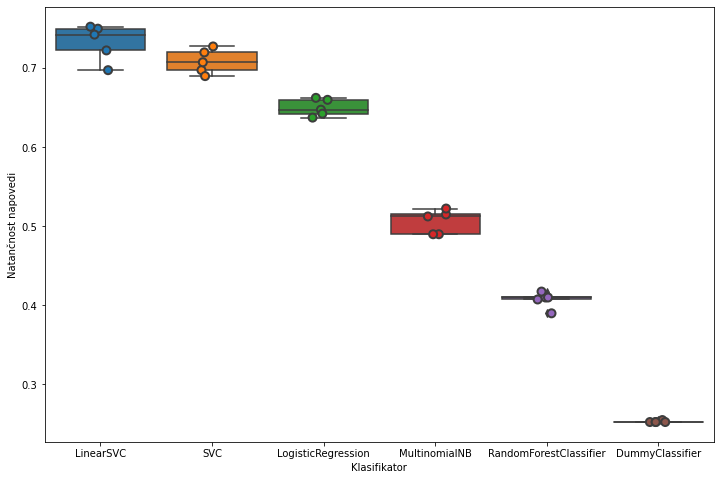

In [21]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.rcParams["figure.figsize"] = (12,8)
plt.ylabel('Natančnost napovedi')
plt.xlabel('Klasifikator')
plt.show()

In [22]:
cv_df.groupby('model_name').accuracy.mean()

model_name
DummyClassifier           0.2530
LinearSVC                 0.7330
LogisticRegression        0.6500
MultinomialNB             0.5060
RandomForestClassifier    0.4070
SVC                       0.7085
Name: accuracy, dtype: float64